# Getting started with INTEGRATE - with no forward code

This notebook contains a simple example of geeting started with INTEGRATE

In [1]:
try:
    # Check if the code is running in an IPython kernel (which includes Jupyter notebooks)
    get_ipython()
    # If the above line doesn't raise an error, it means we are in a Jupyter environment
    # Execute the magic commands using IPython's run_line_magic function
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
except:
    # If get_ipython() raises an error, we are not in a Jupyter environment
    #%load_ext autoreload
    #%autoreload 2
    pass

In [2]:
import integrate as ig
parallel = ig.use_parallel(showInfo=1)

Notebook detected. Parallel processing is OK


In [3]:
case = 'DAUGAARD'
files = ig.get_case_data(case=case,  loadType='prior_data')
f_data_h5 = files[0]
f_prior_h5 = files[-1]
file_gex= ig.get_gex_file_from_data(f_data_h5)

print("Using data file: %s" % f_data_h5)
print("Using prior/data file: %s" % f_prior_h5)
print("Using GEX file: %s" % file_gex)

Getting data for case: DAUGAARD
--> Got data for case: DAUGAARD
Using data file: DAUGAARD_AVG.h5
Using prior/data file: prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5
Using GEX file: TX07_20231016_2x4_RC20-33.gex


## 1. Setup the prior model, $\rho(\mathbf{m},\mathbf{d})$
In this example we assume that realization of both 'm' and 'd' are available.

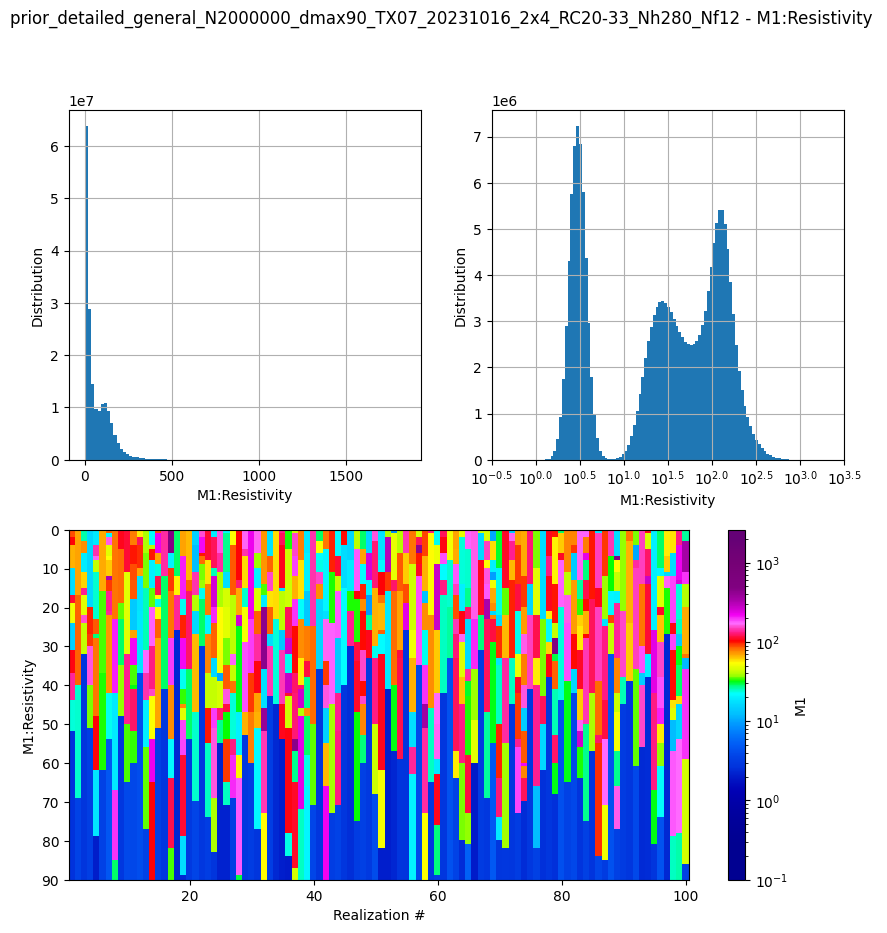

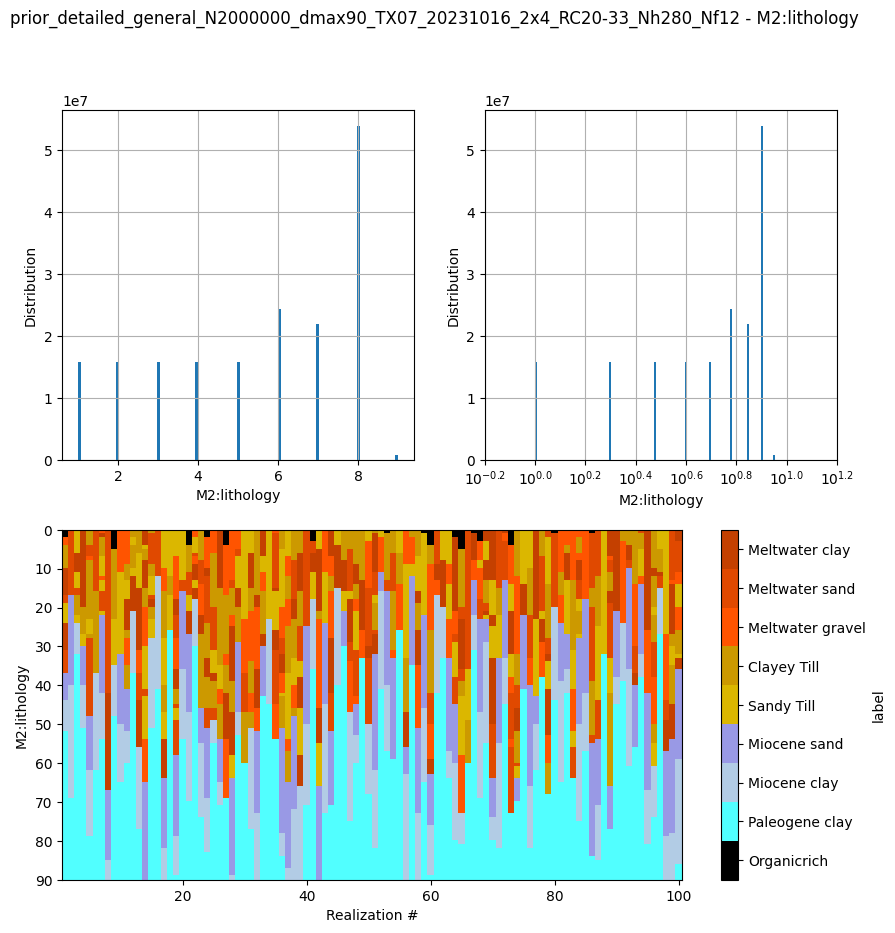

In [4]:
ig.plot_prior_stats(f_prior_h5)

## Sample the posterior $\sigma(\mathbf{m})$

The posterior distribution is sampling using the extended rejection sampler.

In [5]:
if parallel:
    N_use = 100000 # Use all data in prior lookup table
else:
    N_use = 10000 # Use only a small subset, whn not using parallel
f_post_h5 = ig.integrate_rejection(f_prior_h5, f_data_h5, N_use = N_use, parallel=parallel, showInfo=1)

File POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1.h5 allready exists
Overwriting...
Number of data points: 11693 (available), 11693 (used). Nchunks=32, Ncpu=32


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 365/365 [01:56<00:00,  3.14it/s]


T_av=12.3, Time=120.1s/11693 soundings ,10.3ms/sounding, 97.3it/s
integrate_update_prior_attributes: Checking D1
integrate_update_prior_attributes: Checking M1
prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5: M1.is_discrete=0
integrate_update_prior_attributes: Checking M2
prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12.h5: M2.is_discrete=1
D1: NOT RECOGNIZED
M1: CONTINUOUS
Creating /M1/Mean in POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1.h5
Creating /M1/Median in POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1.h5
Creating /M1/Std in POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1.h5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11693/11693 [00:12<00:00, 919.62it/s]


M2: DISCRETE, N_classes =9
Creating /M2/Mode in POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1.h5
Creating /M2/Entropy in POST_DAUGAARD_AVG_prior_detailed_general_N2000000_dmax90_TX07_20231016_2x4_RC20-33_Nh280_Nf12_Nu100000_aT1.h5
Creating /M2/P


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11693/11693 [00:10<00:00, 1109.28it/s]


### Plot some statistic from $\sigma(\mathbf{m})$

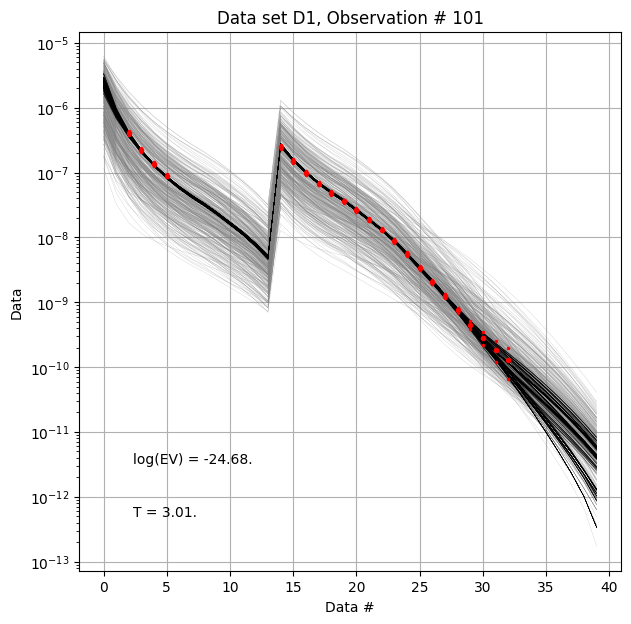

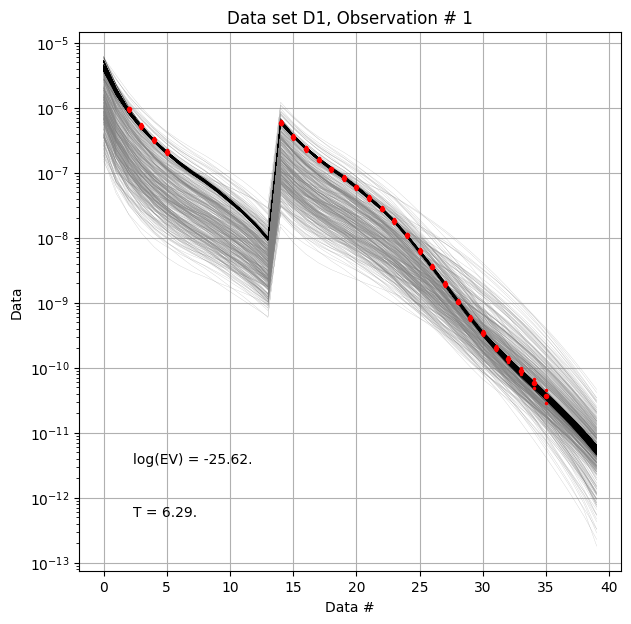

In [6]:
ig.plot_data_prior_post(f_post_h5, i_plot=100)
ig.plot_data_prior_post(f_post_h5, i_plot=0)

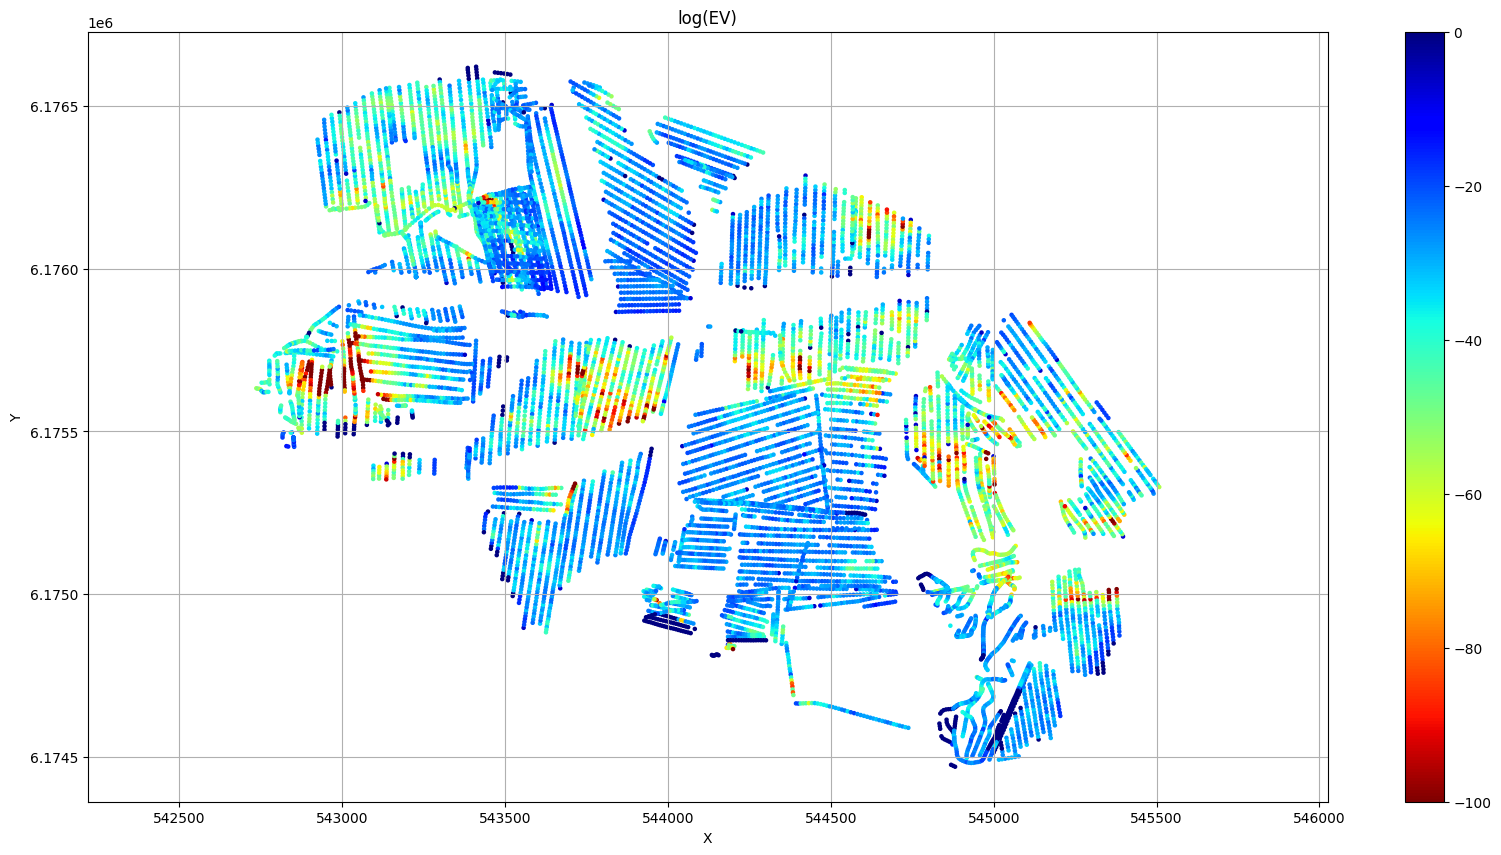

In [7]:
# Plot the Temperature used for inversion
ig.plot_T_EV(f_post_h5, pl='EV', hardcopy=True)

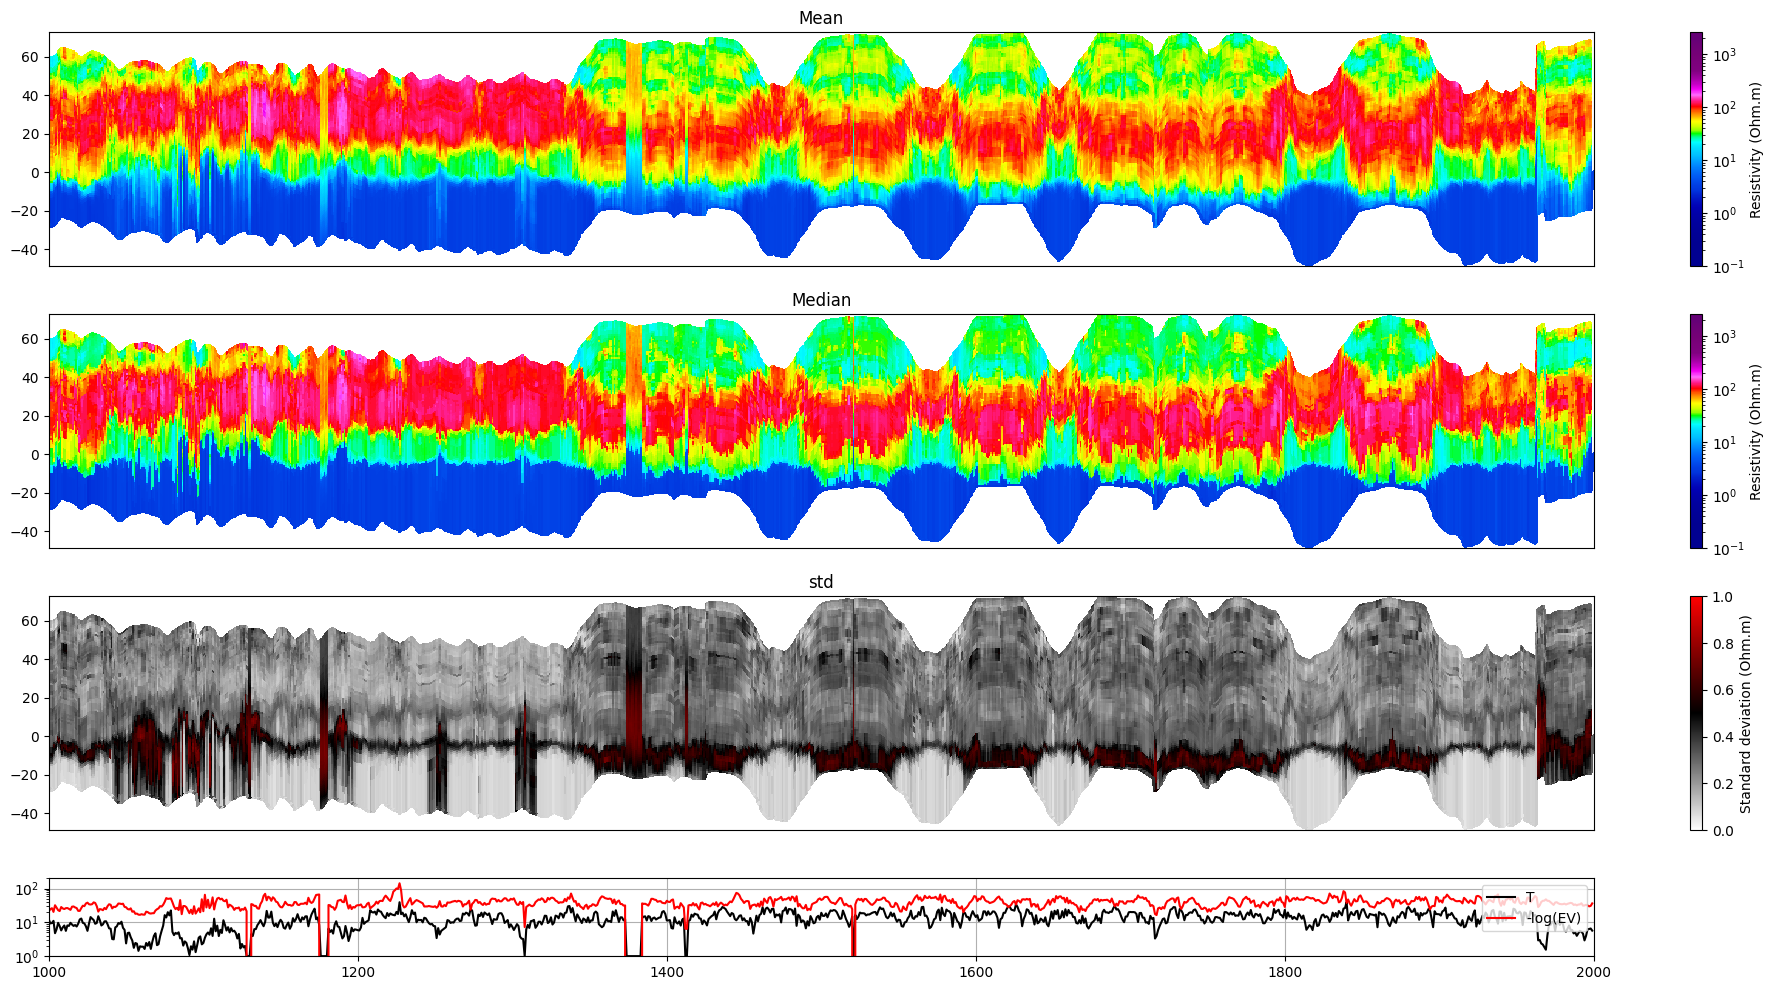

In [8]:
# Plot profile of model parameter type 1 (resistivity)
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=1)

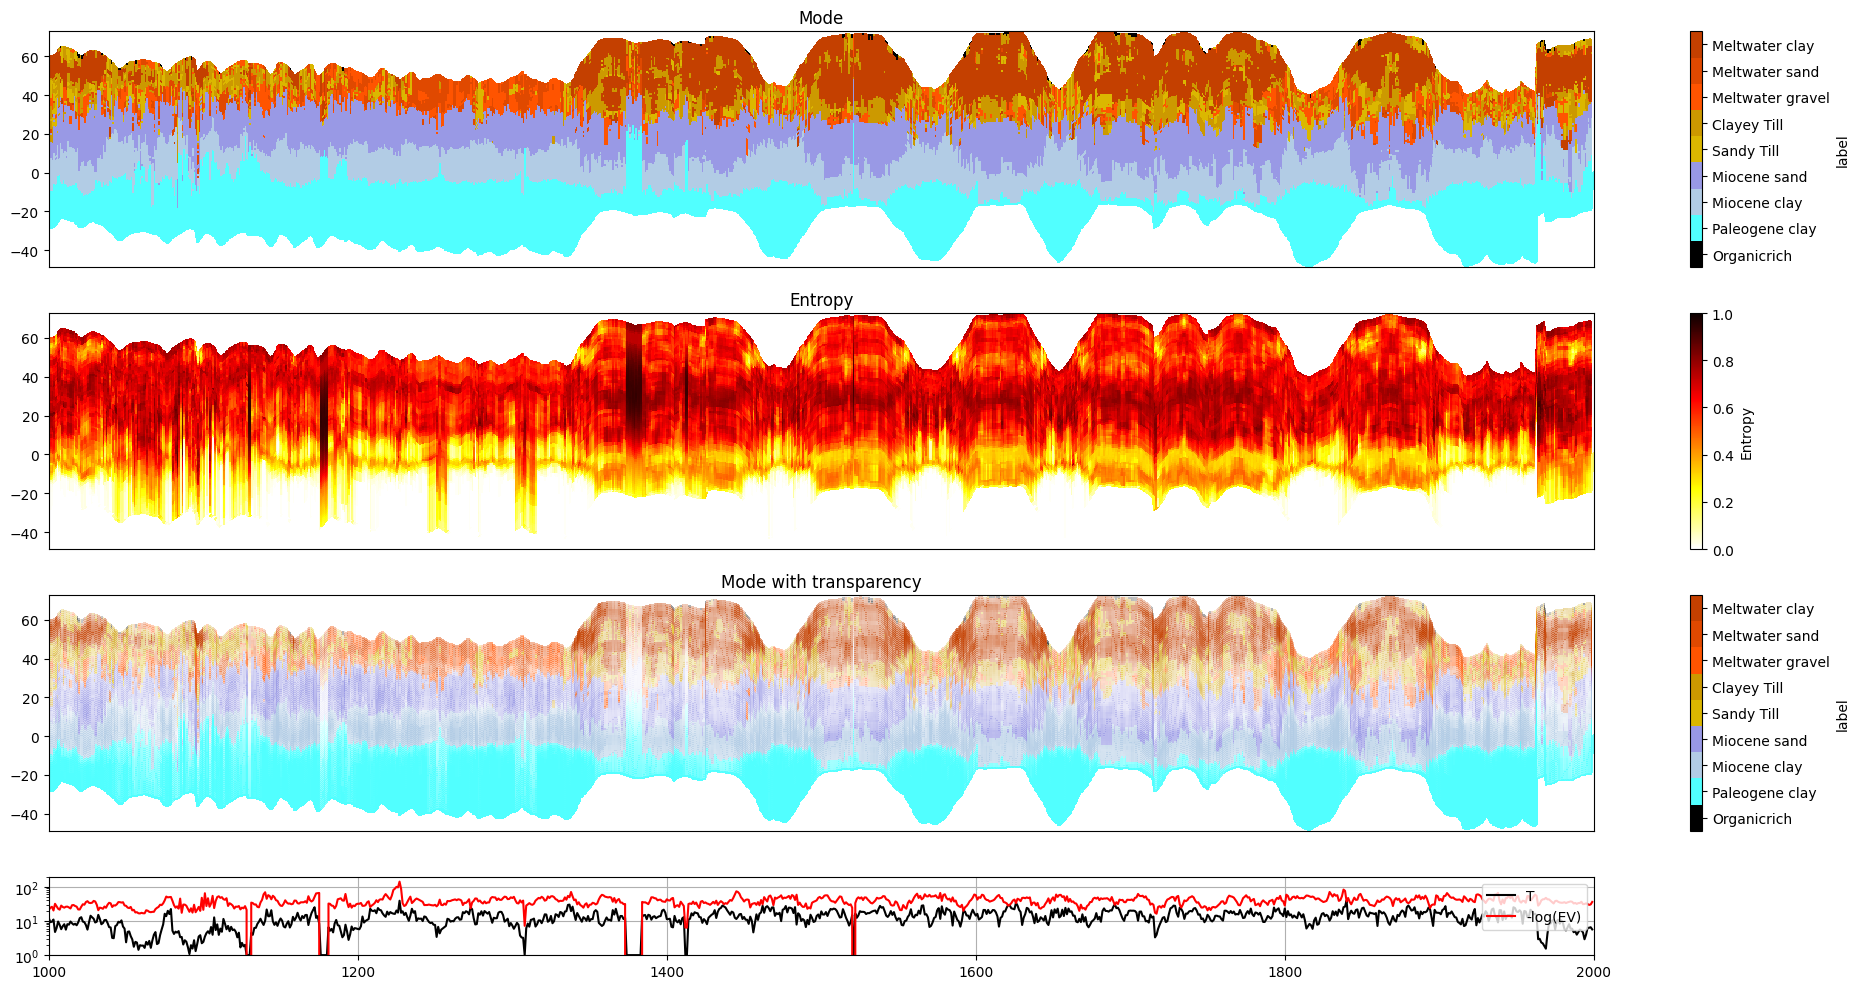

In [9]:
# Plot profile of model parameter type 2 (lithology)
ig.plot_profile(f_post_h5, i1=1000, i2=2000, im=2)

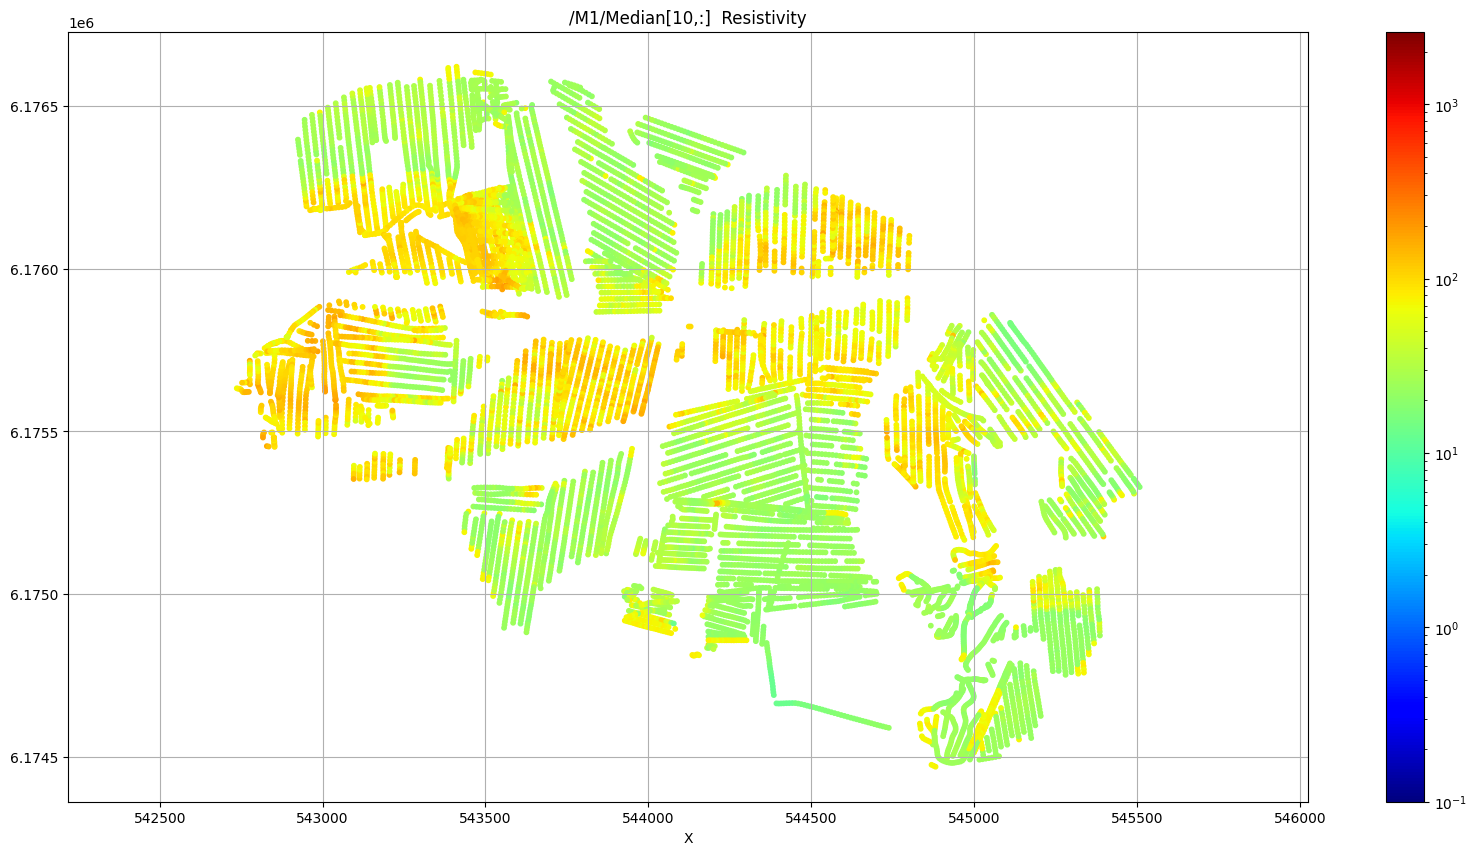

In [10]:
# Plot the Median  of the 1st type model parameter (resistivity) at at layer 10
ig.plot_feature_2d(f_post_h5,im=1,iz=10, key='Median', uselog=1, cmap='jet', s=10)



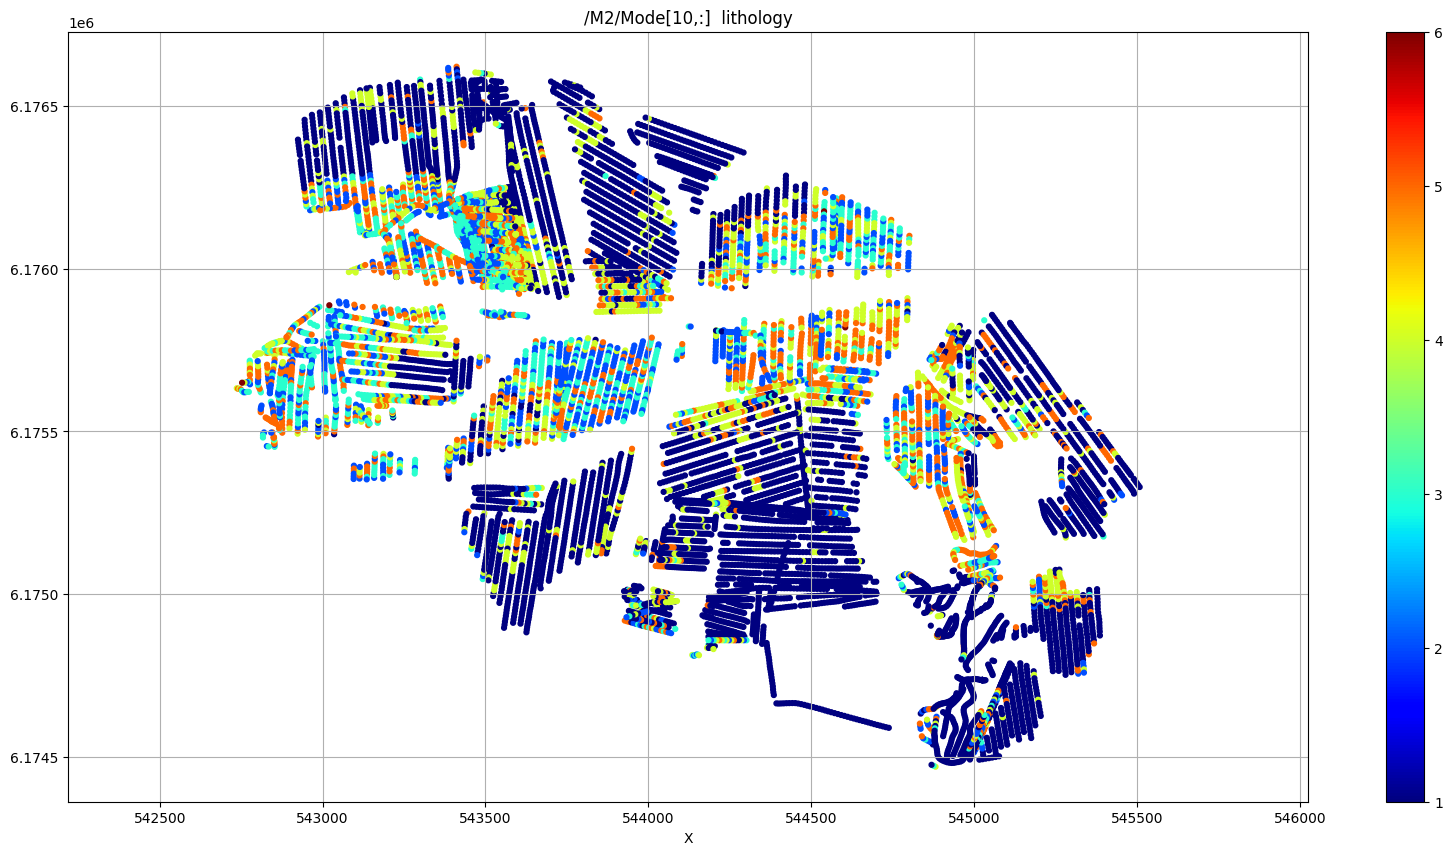

In [11]:
# Plot the mode of the 2nd type model parameter (lithology) at at layer 10
ig.plot_feature_2d(f_post_h5,im=2,iz=10,key='Mode', uselog=0, clim=[1,6], cmap='jet', s=12)